<a href="https://colab.research.google.com/github/Pramanik4/Anomalies_Detection_Project/blob/main/Anomalies_Detection_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imported all the required libraries**

In [ ]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as mp
import plotly.express as px
from sklearn.cluster import KMeans

# **Loaded the dataset using Pandas Library**

In [ ]:
dataset = pd.read_csv("dataset.csv")
dataset.head()

,date_time,src_ip,dest_ip,site,url,webapp_host,attack_type,http_method,action,Country,Forwarded_IP,X-ORIGINAL-HOST,X-Original-URL
0,10/4/2023 09:55,49.47.241.155,192.86.98.102,192.86.98.102,192.86.98.102:443/,boomerangprod.worldbank.org,NaN,POST,passed,India,49.47.241.155,NaN,NaN
1,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5036/images/donation/24hrs-org.png,intranet.worldbank.org,NaN,GET,passed,NaN,138.220.110.143,intranet.worldbank.org,/images/donation/24hrs-org.png
2,10/4/2023 09:55,160.120.189.141,192.86.98.29,192.86.98.29,192.86.98.29:443/secure/common/userpreferences...,ebizprd.worldbank.org,NaN,GET,passed,Ivory Coast,160.120.189.141,NaN,NaN
3,10/4/2023 09:55,10.168.238.5,10.168.233.21,10.168.233.21,10.168.233.21:5033/api/yammer/getdata,skillfinderapi.ase.worldbank.org,NaN,OPTIONS,passed,NaN,192.86.106.32,peopleapi.worldbank.org,/api/yammer/getdata?key=1661606924&type=userid
4,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5049/api/enterprise-search/gc/v1...,intranetsearchapi.worldbank.org,NaN,POST,passed,NaN,134.238.248.19,intranetsearchapi.worldbank.org,/api/enterprise-search/gc/v1/orderedresult


# **Total Rows and Columns**

In [ ]:
dataset.shape

(34555, 13)

Total Rows : 34555 Total Columns : 24

# **Attributes Data Types**

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34555 entries, 0 to 34554
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   date_time        34555 non-null  object
 1   src_ip           34552 non-null  object
 2   dest_ip          34555 non-null  object
 3   site             34555 non-null  object
 4   url              34551 non-null  object
 5   webapp_host      34102 non-null  object
 6   attack_type      4733 non-null   object
 7   http_method      34168 non-null  object
 8   action           34551 non-null  object
 9   Country          5837 non-null   object
 10  Forwarded_IP     28777 non-null  object
 11  X-ORIGINAL-HOST  18095 non-null  object
 12  X-Original-URL   18095 non-null  object
dtypes: object(13)
memory usage: 3.4+ MB


# **Unique values in each Column**

In [ ]:
dataset.nunique()

date_time            19
src_ip             1409
dest_ip             106
site                107
url                9789
webapp_host         869
attack_type          17
http_method           5
action                3
Country             123
Forwarded_IP       3554
X-ORIGINAL-HOST      75
X-Original-URL     6927
dtype: int64

# **Drop Off Duplicates Values**

In [ ]:
dataset.duplicated().sum()

5385

In [ ]:
dataset.drop_duplicates(inplace=True)

# **Total No. of Missing values**

In [ ]:
dataset.isnull().sum()

date_time              0
src_ip                 3
dest_ip                0
site                   0
url                    4
webapp_host           59
attack_type        25105
http_method           27
action                 4
Country            25104
Forwarded_IP        5075
X-ORIGINAL-HOST    12837
X-Original-URL     12837
dtype: int64

# **Remove Null value (Forwarded_IP)**

In [ ]:
dataset = dataset.dropna(subset=['Forwarded_IP'])

<Axes: >

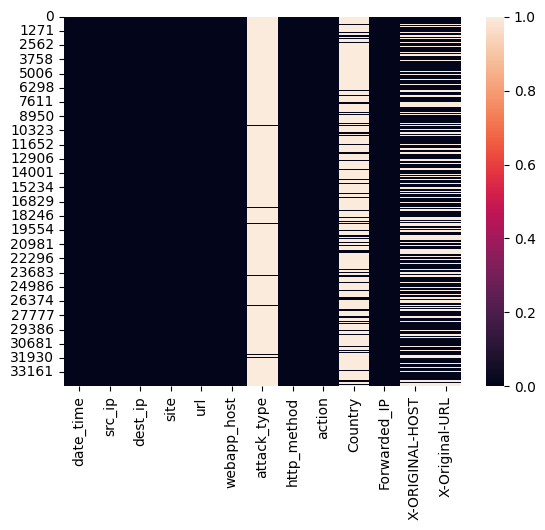

In [ ]:
sb.heatmap(dataset.isnull())

The code will remove the missing value

# **let's see Unique no. of Forwarded IP**

In [ ]:
dataset['Forwarded_IP'].nunique()

3554

# **Total Websites**

In [ ]:
dataset['webapp_host'].nunique()

286

# **Segregate IP into Internal & External**

In [ ]:
def ip_types(Forwarded_IP):
    if Forwarded_IP.startswith('164.114.') or Forwarded_IP.startswith('138.220.'):
        return 'Internal'
    else:
        return 'External'

dataset['IP_types'] = dataset['Forwarded_IP'].apply(ip_types)

# **Scatter Plot on Internal & External IPs**

In [ ]:
import plotly.express as px
fig = px.scatter(dataset, x='Forwarded_IP', y='webapp_host',color='IP_types')

# Show the plot
fig.show()

# **Most Attack on Which Website**

In [ ]:
dataset['attack_type'].value_counts().head()

Buffer Overflow               287
HTTP Parser Attack            134
Forceful Browsing              31
Detection Evasion              23
Server Side Code Injection     11
Name: attack_type, dtype: int64

In [ ]:
attack_types_counts = dataset.groupby('webapp_host')['attack_type'].value_counts().unstack(fill_value=0)
fig = px.line(attack_types_counts, x=attack_types_counts.index, y=attack_types_counts.columns, title='Attacks on Websites')
fig.show()


# **Which Website is Accessed the most**

In [ ]:
dataset['http_method'].value_counts()

GET        18436
POST        3328
OPTIONS     2255
HEAD          54
PUT           19
Name: http_method, dtype: int64

In [ ]:
custom_colors = {
    'GET': 'red',
    'POST': 'green',
    'OPTIONs': 'blue',
    'HEAD': 'orange',
    'PUT': 'purple'
}
get_counts = dataset.groupby(['webapp_host', 'http_method']).size().unstack(fill_value=0)
fig = px.line(get_counts, x=get_counts.index, y=get_counts.columns, title='HTTP Method on Websites',color='http_method',color_discrete_map=custom_colors)
fig.show()


# **Action Types**

In [ ]:
custom_colors = {
    'alerted': 'blue',
   'blocked': 'red',
  'passed': 'green',
 }
get_counts = dataset.groupby(['webapp_host', 'action']).size().unstack(fill_value=0)

# Create a line chart for all methods
fig = px.line(get_counts, x=get_counts.index, y=get_counts.columns, title='Action on Websites',color='action',color_discrete_map=custom_colors)

# Show the plot
fig.show()


# **IP to Numeric Value**

In [ ]:
def ip_to_numeric(ip):
    octets = ip.split(".")
    numeric_value = int(octets[0]) * 256**3 + int(octets[1]) * 256**2 + int(octets[2]) * 256 + int(octets[3])
    return numeric_value


In [ ]:
dataset['numeric_ip'] = dataset['Forwarded_IP'].apply(ip_to_numeric)

In [ ]:
dataset['numeric_ip']

0         825225627
1        2329702031
2        2692267405
3        3226888736
4        2263808019
            ...    
34546    1892573246
34548    1043986939
34549    1043986939
34550    1043986939
34553    1439720161
Name: numeric_ip, Length: 24095, dtype: int64

In [ ]:
dataset.head()

,date_time,src_ip,dest_ip,site,url,webapp_host,attack_type,http_method,action,Country,Forwarded_IP,X-ORIGINAL-HOST,X-Original-URL,IP_types,numeric_ip
0,10/4/2023 09:55,49.47.241.155,192.86.98.102,192.86.98.102,192.86.98.102:443/,boomerangprod.worldbank.org,NaN,POST,passed,India,49.47.241.155,NaN,NaN,External,825225627
1,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5036/images/donation/24hrs-org.png,intranet.worldbank.org,NaN,GET,passed,NaN,138.220.110.143,intranet.worldbank.org,/images/donation/24hrs-org.png,Internal,2329702031
2,10/4/2023 09:55,160.120.189.141,192.86.98.29,192.86.98.29,192.86.98.29:443/secure/common/userpreferences...,ebizprd.worldbank.org,NaN,GET,passed,Ivory Coast,160.120.189.141,NaN,NaN,External,2692267405
3,10/4/2023 09:55,10.168.238.5,10.168.233.21,10.168.233.21,10.168.233.21:5033/api/yammer/getdata,skillfinderapi.ase.worldbank.org,NaN,OPTIONS,passed,NaN,192.86.106.32,peopleapi.worldbank.org,/api/yammer/getdata?key=1661606924&type=userid,External,3226888736
4,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5049/api/enterprise-search/gc/v1...,intranetsearchapi.worldbank.org,NaN,POST,passed,NaN,134.238.248.19,intranetsearchapi.worldbank.org,/api/enterprise-search/gc/v1/orderedresult,External,2263808019


# **Websites value to Numeric Value**

In [ ]:
import socket
import pandas as pd

def convert_to_numeric(value):
    try:
        ip = socket.gethostbyname(value)
        numeric_value = int(ip.replace('.', ''))
        return numeric_value
    except socket.gaierror:
        subdomain = value.split('.')[0]
        numeric_value = int.from_bytes(subdomain.encode(), byteorder='big')
        return numeric_value

dataset['webapp_host'] = dataset['webapp_host'].astype(str)
dataset['numeric_websites'] = dataset['webapp_host'].apply(convert_to_numeric)

In [ ]:
dataset.head()

,date_time,src_ip,dest_ip,site,url,webapp_host,attack_type,http_method,action,Country,Forwarded_IP,X-ORIGINAL-HOST,X-Original-URL,IP_types,numeric_ip,numeric_websites
0,10/4/2023 09:55,49.47.241.155,192.86.98.102,192.86.98.102,192.86.98.102:443/,boomerangprod.worldbank.org,NaN,POST,passed,India,49.47.241.155,NaN,NaN,External,825225627,1928698102
1,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5036/images/donation/24hrs-org.png,intranet.worldbank.org,NaN,GET,passed,NaN,138.220.110.143,intranet.worldbank.org,/images/donation/24hrs-org.png,Internal,2329702031,52188136184
2,10/4/2023 09:55,160.120.189.141,192.86.98.29,192.86.98.29,192.86.98.29:443/secure/common/userpreferences...,ebizprd.worldbank.org,NaN,GET,passed,Ivory Coast,160.120.189.141,NaN,NaN,External,2692267405,192869829
3,10/4/2023 09:55,10.168.238.5,10.168.233.21,10.168.233.21,10.168.233.21:5033/api/yammer/getdata,skillfinderapi.ase.worldbank.org,NaN,OPTIONS,passed,NaN,192.86.106.32,peopleapi.worldbank.org,/api/yammer/getdata?key=1661606924&type=userid,External,3226888736,2340987144810892887654058422268009
4,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5049/api/enterprise-search/gc/v1...,intranetsearchapi.worldbank.org,NaN,POST,passed,NaN,134.238.248.19,intranetsearchapi.worldbank.org,/api/enterprise-search/gc/v1/orderedresult,External,2263808019,52188136184


# **Check for Distribution**

<ipython-input-29-a0eab3826c47>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='numeric_ip', ylabel='Density'>

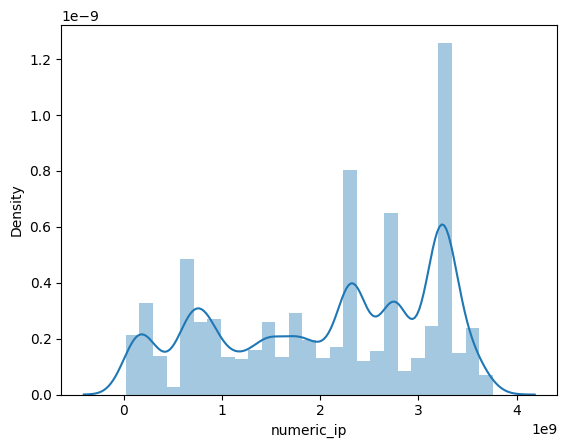

In [ ]:
sb.distplot(dataset['numeric_ip'])

<Axes: >

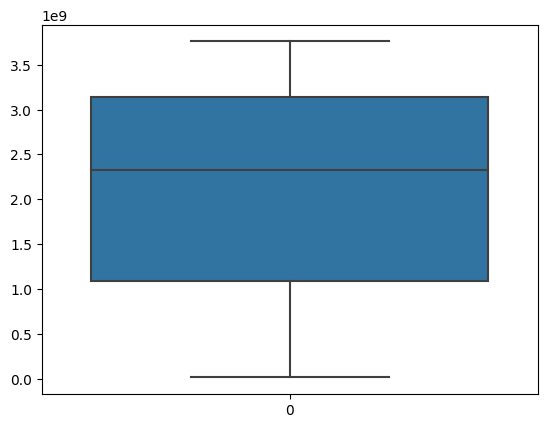

In [ ]:
sb.boxplot(dataset['numeric_ip'])

# **Normalization**

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

columns_to_normalize = ['numeric_ip', 'numeric_websites']
scaler = MinMaxScaler()
dataset[columns_to_normalize] = scaler.fit_transform(dataset[columns_to_normalize])

In [ ]:
dataset.head()

,date_time,src_ip,dest_ip,site,url,webapp_host,attack_type,http_method,action,Country,Forwarded_IP,X-ORIGINAL-HOST,X-Original-URL,IP_types,numeric_ip,numeric_websites
0,10/4/2023 09:55,49.47.241.155,192.86.98.102,192.86.98.102,192.86.98.102:443/,boomerangprod.worldbank.org,NaN,POST,passed,India,49.47.241.155,NaN,NaN,External,0.215449,1.170333e-53
1,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5036/images/donation/24hrs-org.png,intranet.worldbank.org,NaN,GET,passed,NaN,138.220.110.143,intranet.worldbank.org,/images/donation/24hrs-org.png,Internal,0.618104,3.170444e-52
2,10/4/2023 09:55,160.120.189.141,192.86.98.29,192.86.98.29,192.86.98.29:443/secure/common/userpreferences...,ebizprd.worldbank.org,NaN,GET,passed,Ivory Coast,160.120.189.141,NaN,NaN,External,0.715141,1.157656e-54
3,10/4/2023 09:55,10.168.238.5,10.168.233.21,10.168.233.21,10.168.233.21:5033/api/yammer/getdata,skillfinderapi.ase.worldbank.org,NaN,OPTIONS,passed,NaN,192.86.106.32,peopleapi.worldbank.org,/api/yammer/getdata?key=1661606924&type=userid,External,0.858226,1.422219e-29
4,10/4/2023 09:55,10.168.238.7,10.168.233.21,10.168.233.21,10.168.233.21:5049/api/enterprise-search/gc/v1...,intranetsearchapi.worldbank.org,NaN,POST,passed,NaN,134.238.248.19,intranetsearchapi.worldbank.org,/api/enterprise-search/gc/v1/orderedresult,External,0.600469,3.170444e-52


# **Rounding Off till 2 Decimal values**

In [ ]:
# Assuming you have a DataFrame named df
dataset['numeric_ip'] = dataset['numeric_ip'].round(2)
dataset['numeric_websites'] = dataset['numeric_websites'].round(2)


# **K-Means Clustering**

In [ ]:
fields = dataset.iloc[:,[14,15]].values

In [ ]:
print(fields)

[[0.22 0.  ]
 [0.62 0.  ]
 [0.72 0.  ]
 ...
 [0.27 0.  ]
 [0.27 0.  ]
 [0.38 0.  ]]


In [ ]:
wcss = []
for index in range(1,11):
    kmeans = KMeans(n_clusters = index, init = "k-means++", random_state = 2)
    kmeans.fit(fields)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

Text(0, 0.5, 'WCSS')

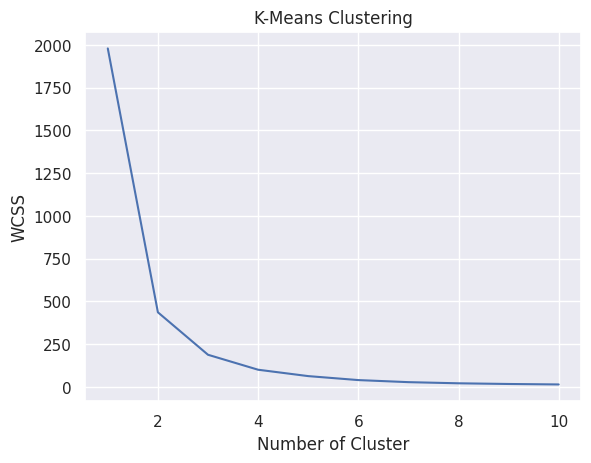

In [ ]:
sb.set()
mp.plot(range(1,11), wcss)
mp.title("K-Means Clustering")
mp.xlabel("Number of Cluster")
mp.ylabel("WCSS")

In [ ]:
kmeans = KMeans(n_clusters=3, init="k-means++",random_state=42)
cluster_values = kmeans.fit_predict(fields)
print(cluster_values)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



[1 2 0 ... 1 1 2]


In [ ]:
import plotly.express as px
import plotly.graph_objects as go
fig = px.scatter(x=fields[:, 0], y=fields[:, 1], color=cluster_values,
                 color_continuous_scale=px.colors.qualitative.Set1, title="Customer Groups",
                 labels={"x": "numeric_ip", "y": "numeric_websites"})
fig.add_trace(go.Scatter(x=kmeans.cluster_centers_[:, 0], y=kmeans.cluster_centers_[:, 1],
                         mode='markers', marker=dict(size=10, color="black"), name="Centroids"))
fig.show()

# **Isolation Forest Anomaly Detection Algorithm**

In [ ]:
from sklearn.ensemble import IsolationForest
selected_columns = dataset[['numeric_ip','numeric_websites']]
iso_forest = IsolationForest(contamination=0.1, random_state=42)
iso_forest.fit(selected_columns)
anomaly_labels = iso_forest.predict(selected_columns)
anomalies = dataset[anomaly_labels == -1]
print("Anomalies:")
print(anomalies)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



Anomalies:
             date_time          src_ip         dest_ip            site  \
33     10/4/2023 09:54    15.177.46.48  192.86.102.178  192.86.102.178   
35     10/4/2023 09:54    15.177.42.48  192.86.102.178  192.86.102.178   
80     10/4/2023 09:54    10.168.238.7   10.168.233.21   10.168.233.21   
90     10/4/2023 09:54    10.168.238.9   10.168.233.21   10.168.233.21   
102    10/4/2023 09:54    10.168.238.9   10.168.233.21   10.168.233.21   
...                ...             ...             ...             ...   
34222  10/4/2023 09:53    10.168.238.5   10.168.233.21   10.168.233.21   
34226  10/4/2023 09:53    10.168.238.5   10.168.233.21   10.168.233.21   
34326  10/4/2023 09:53    10.168.238.5   10.168.233.21   10.168.233.21   
34328  10/4/2023 09:53    10.168.238.4   10.168.233.21   10.168.233.21   
34353  10/4/2023 09:53  213.150.192.38    192.86.98.29    192.86.98.29   

                                                     url  \
33                                   192

In [ ]:
import plotly.express as px
fig = px.scatter(data_frame=dataset, x='numeric_ip', y='numeric_websites', title="Anomalies Detected")
fig.add_trace(go.Scatter(x=anomalies['numeric_ip'], y=anomalies['numeric_websites'], mode='markers', name='Anomalies'))
fig.update_traces(marker=dict(size=8, opacity=0.7))
fig.show()